In [209]:
import pandas as pd
from FileManager import FileManager
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn import linear_model
import numpy as np
from matplotlib import pyplot

In [210]:
fileManager = FileManager()

/bin/sh: 1: cd: can't cd to /home/vludvig/nas/Desktop/SoilMixingSimulation/FormSimulation/data/3DForm_50/train_npy


In [211]:
df = pd.read_csv(fileManager._get_path_global_csv_file()).set_index("id_micro")
#column_X = ["f_2", "f_3", "M1,1"]#, "M1,2", "M1,3", "M1,4", "M1,5", "M1,6", "M2,2", "M2,3", "M2,4", "M2,5", "M2,6", "M3,3", "M3,4", "M3,5", "M3,6", "M4,4", "M4,5", "M4,6", "M5,5", "M5,6", "M6,6"]
#column_X = ["M1,1"] #around 0.6
#column_X = ["f_2", "f_3"]
#column_X = ["f_2", "f_3", "M1,1"] #around 0.7
#column_X = ["f_2", "f_3", "M1,1", "M2,2", "M3,3", "M4,4", "M5,5", "M6,6"] #above 0.7
column_X = ["M1,1", "M1,2", "M1,3", "M1,4", "M1,5", "M1,6", "M2,2", "M2,3", "M2,4", "M2,5", "M2,6", "M3,3", "M3,4", "M3,5", "M3,6", "M4,4", "M4,5", "M4,6", "M5,5", "M5,6", "M6,6", "f_2", "f_3"] # above 0.8
column_Y = ["last_sigma"]
X = df[column_X]
y = df[column_Y]

In [212]:
train, test = train_test_split(df, test_size=0.2, random_state=25)
X_train, X_val = train[column_X], test[column_X]
y_train, y_val = train[column_Y], test[column_Y]
std_scaler = StandardScaler()
y_train_scaled = std_scaler.fit_transform(y_train)
y_val_scaled = std_scaler.transform(y_val)

In [213]:
Reg = make_pipeline(StandardScaler(), linear_model.LinearRegression())
Reg.fit(X_train, y_train_scaled.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [214]:
Reg.score(X_train, y_train_scaled.ravel())

0.7750329985101294

In [215]:
Reg.score(X_val, y_val_scaled.ravel())

0.7801610930153487

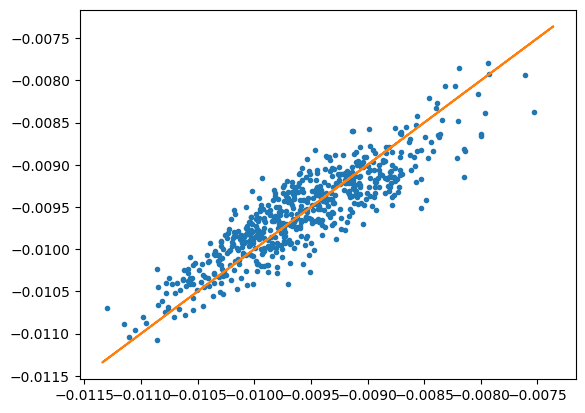

In [216]:
y_predict_scaled = Reg.predict(X_val)
plt.plot(y_val, std_scaler.inverse_transform(y_predict_scaled.reshape(-1,1)), ".")
plt.plot(y,y)

In [217]:
importance = np.asarray(Reg[1].coef_)

In [218]:
importance

array([-1.37912694, -1.77516901, -1.77838238,  0.01033861,  0.01385335,
       -0.01470983,  0.32399617,  1.16412685,  0.02513273, -0.00814324,
        0.01510228,  0.28723489, -0.0174491 , -0.00949841, -0.01074596,
       -0.8494711 ,  0.0203736 , -0.00340082,  0.79365301, -0.01316874,
        0.70892769,  1.06670899, -1.50418756])

In [219]:
labels_bar_plot = [column_X[i][1:] for i in range(len(column_X)-2)] + column_X[-2:]

In [220]:
#fig, ax = plt.subplots(figsize=(20,20))
#plt.bar(labels_bar_plot, importance)
#ax.tick_params(axis="both", labelsize=22)
#fig.savefig("/home/vludvig/nas/stage/python/clustering_v1/experiments/experiment2/images/linear_regression_coefficient")
#plt.xticks(rotation = 45)

In [221]:
importance

array([-1.37912694, -1.77516901, -1.77838238,  0.01033861,  0.01385335,
       -0.01470983,  0.32399617,  1.16412685,  0.02513273, -0.00814324,
        0.01510228,  0.28723489, -0.0174491 , -0.00949841, -0.01074596,
       -0.8494711 ,  0.0203736 , -0.00340082,  0.79365301, -0.01316874,
        0.70892769,  1.06670899, -1.50418756])

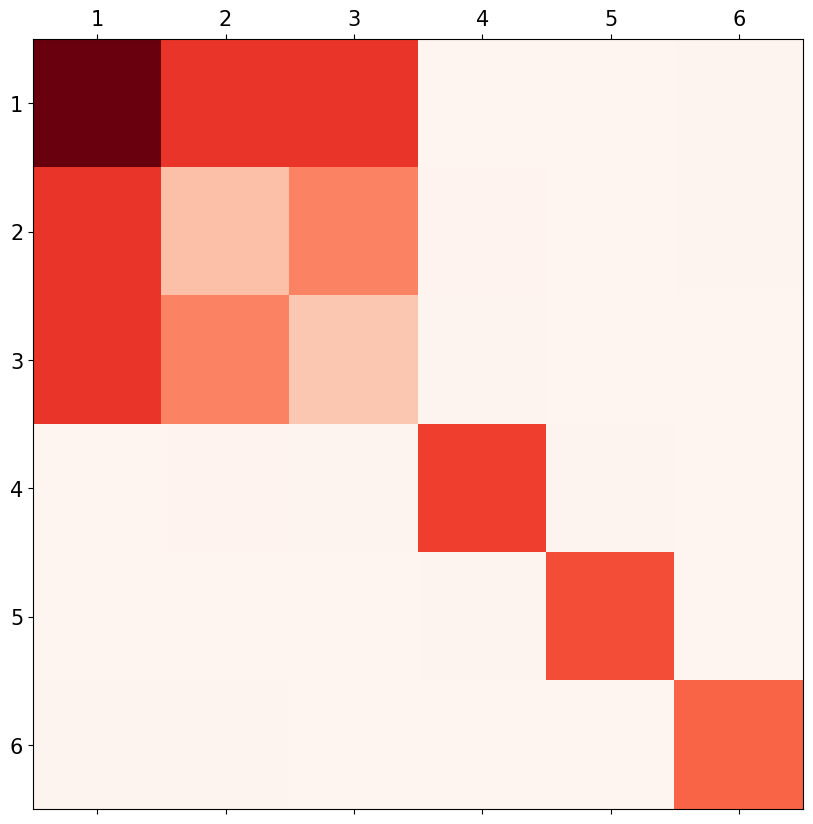

In [222]:
import re
matrix = np.zeros((6,6))
for m in range (len(column_X)-2):
    i = int(column_X[m][1])
    j = int(column_X[m][3])
    matrix[i-1,j-1] = abs(importance[m])
matrix += np.transpose(matrix)
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(matrix, cmap=plt.cm.Reds)
ax.set_xticks(np.arange(6))
ax.set_xticklabels(np.arange(1,7))
ax.set_yticks(np.arange(6))
ax.set_yticklabels(np.arange(1,7))
ax.tick_params(axis="both", labelsize=15)
#fig.savefig("/home/vludvig/nas/stage/python/clustering_v1/experiments/experiment2/images/linear_regression_matrix.png")
#plt.title("Elasticity matrix linear regression")

Text(0.5, 1.0, 'Importance of features on the validation set')

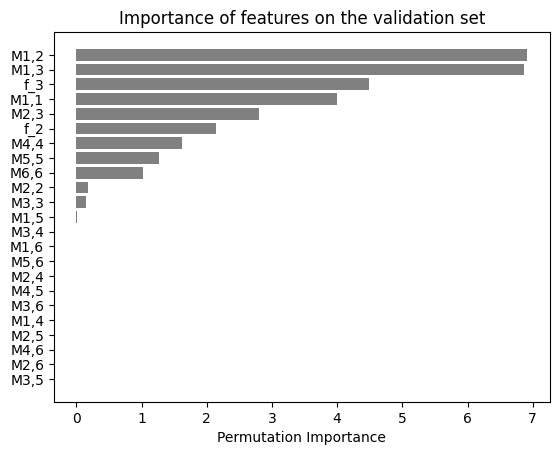

In [223]:
r_train = permutation_importance(Reg, X_val, y_val_scaled, n_repeats=10)
features = np.array(column_X)
sorted_idx_train = r_train.importances_mean.argsort()
plt.barh(features[sorted_idx_train], r_train.importances_mean[sorted_idx_train], color="gray")
plt.xlabel("Permutation Importance")
plt.title("Importance of features on the validation set")

## Prediction of overlapping curves

In [262]:
N_test = len(test)
M1 = test['M1,1'].values
N_couple = int((N_test*(N_test-1))/2)
y_train_np = abs(y_train.values)
overlap = [(M1[i]-M1[j])*(y_train_np[i]-y_train_np[j]) < 0 for i in range(N_test) for j in range(i+1, N_test)]

In [256]:
y_predicted = abs(std_scaler.inverse_transform(y_predict_scaled.reshape(-1,1)))
overlap_predicted = [(M1[i]-M1[j])*(y_predicted[i]-y_predicted[j]) < 0 for i in range(N_test) for j in range(i+1, N_test)]

In [263]:
true_positive = 0
false_positive = 0
true_negative = 0
false_negative = 0
for i in range(N_couple):
    if overlap[i] and overlap_predicted[i]:
        true_positive += 1
    elif not overlap[i] and overlap_predicted[i]:
        false_positive += 1
    elif not overlap[i] and not overlap_predicted[i]:
        true_negative += 1
    elif overlap[i] and not overlap_predicted[i]:
        false_negative += 1

In [270]:
precision = true_positive/(true_positive+false_positive)
recall = true_positive/(true_positive+false_negative)
accuracy = (true_positive + true_negative)/N_couple

In [271]:
print(f'precision = {precision}\nrecall = {recall}\naccuracy = {accuracy}')

precision = 0.46516255680748647
recall = 0.19093347461836485
accuracy = 0.48142459654980524
